In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [2]:
%matplotlib inline

# 1d case

In [3]:
files = [f"1d\\data_IF_{i}.hdf5" for i in range(101)]
filesCE = [f"1dCE\\data_IF_{i}.hdf5" for i in range(101)]

fs = []
for f in files:
    fs.append(h5py.File(f, 'r'))
fsCE = []
for fCE in filesCE:
    fsCE.append(h5py.File(fCE, 'r'))    

In [4]:
fsCE[50]['Primitive/T'][:]

array([0.08150178, 0.08160212, 0.08179667, 0.08208626, 0.08247541,
       0.08296408, 0.08354817, 0.08422241, 0.08498198, 0.08582246,
       0.08673935, 0.08772779, 0.08878249, 0.08989779, 0.0910677 ,
       0.09228591, 0.09354586, 0.09484072, 0.09616351, 0.09750707,
       0.09886412, 0.10022731, 0.10158928, 0.10294264, 0.10428008,
       0.10559435, 0.10687835, 0.10812512, 0.10932795, 0.11048032,
       0.11157606, 0.11260933, 0.11357468, 0.11446703, 0.11528149,
       0.11601301, 0.11665609, 0.11720486, 0.11765429, 0.11800262,
       0.11825331, 0.11841189, 0.11847689, 0.11844418, 0.11831625,
       0.11809672, 0.11778158, 0.1173659 , 0.11684978, 0.11623749,
       0.1155348 , 0.11474742, 0.11388049, 0.11293892, 0.1119277 ,
       0.11085216, 0.10971798, 0.10853127, 0.1072985 , 0.10602651,
       0.10472212, 0.10338976, 0.1020248 , 0.10060606, 0.09913484,
       0.09783031, 0.09705489, 0.0968716 , 0.0976927 , 0.10061361,
       0.1075362 , 0.1215728 , 0.14722095, 0.19020002, 0.25653

In [5]:
fs[0]['Primitive/T'].shape

(256,)

In [6]:
fs[0]['Domain'].attrs.keys()

<KeysViewHDF5 ['Ng', 'Nx', 'Ny', 'Nz', 'dt', 'dx', 'dy', 'dz', 'endTime', 'nx', 'ny', 'nz', 'xmax', 'xmin', 'ymax', 'ymin', 'zmax', 'zmin']>

In [7]:
fs[0]['Optional'].attrs.keys()

<KeysViewHDF5 ['kappa', 'nOptionalSimArgs', 'tau_q']>

In [8]:
kappa = fs[0]['Optional'].attrs['kappa'][0]
tau_q = fs[0]['Optional'].attrs['tau_q'][0]
print(f"Dissipation strength {kappa}, "
      f"relaxation time {tau_q}, "
      f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

Dissipation strength 0.001, relaxation time 0.0001, timestep 0.000390625


In [9]:
fs[-1].attrs['t']

array([0.1])

In [10]:
Tmin = 0
Tmax = 1
x_l = 0.3
x_r = 0.7
width=1e-10

def tophat_tanh(x):
    Tmin = 0
    Tmax = 1
    x_l = 0.3
    x_r = 0.7
    width=1e-10
    return Tmin + (Tmax - Tmin)*( np.tanh((x-x_l)/width) + np.tanh((x_r - x)/width) ) / 2

In [11]:
def qx_0(x,n=0):
    return np.exp(-n)*(1 + np.sin(6*np.pi*x))

In [12]:
def dxqx_0(x,n=0):
    return 1e-2*np.exp(-10*n)*((6*np.pi)*np.cos(6*np.pi*x))

In [13]:
def dxT_0(x):
    sech = lambda x: 1/np.cosh(x)
    return (Tmax - Tmin)*( (1/width)*((sech((x-x_l)/width))**2 - (sech((x_r - x)/width))**2) ) / 2

In [14]:
def dxxT_0(x):
    sech = lambda x: 1/np.cosh(x)
    return (Tmax - Tmin)*( (1/width)**2*((sech((x-x_l)/width))**2*np.tanh((x-x_l)/width) \
                                  + (sech((x_r - x)/width))**2*np.tanh((x_r - x)/width)) )

<ipython-input-14-0cfd7380be85>:2: RuntimeWarning: overflow encountered in cosh
  sech = lambda x: 1/np.cosh(x)


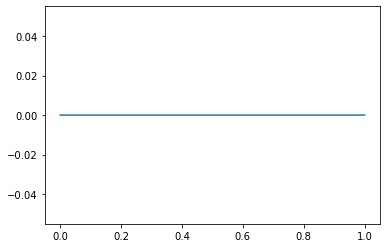

In [15]:
plt.figure()
x = np.linspace(0,1,2048)
plt.plot(x,dxxT_0(x))
plt.show()

In [16]:
x = np.linspace(0,1,2048)

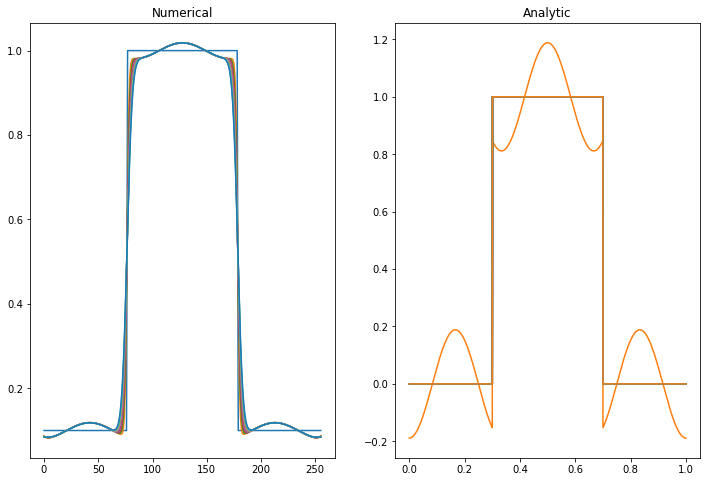

In [17]:
#plt.figure()
fig, axes = plt.subplots(1,2,figsize=(12,8))
axes = axes.flatten()
n_count = 0
for f in fs[::10]:
    axes[0].plot(f['Primitive/T'])
    axes[1].plot(x,tophat_tanh(x))
    axes[1].plot(x,tophat_tanh(x)-dxqx_0(x,n_count))
    axes[0].set_title('Numerical')
    axes[1].set_title('Analytic')
    n_count += 1
#plt.legend()
plt.show()

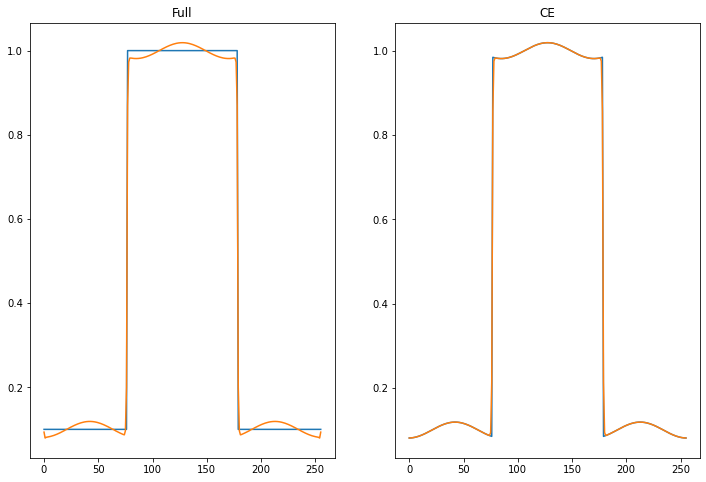

In [26]:
#plt.figure()
fig, axes = plt.subplots(1,2,figsize=(12,8))
axes = axes.flatten()
n_count = 0
for f, fCE in zip(fs[:2:], fsCE[:2:]):
    axes[0].plot(f['Primitive/T'])#[100:156])
    axes[1].plot(fCE['Primitive/T'])#[100:156])

#     axes[1].plot(x,tophat_tanh(x))
#     axes[1].plot(x,tophat_tanh(x)-dxqx_0(x,n_count))
    axes[0].set_title('Full')
    axes[1].set_title('CE')
    n_count += 1
#plt.legend()
plt.savefig('ISvsCE_BoundaryLayerComparison.pdf')
plt.show()

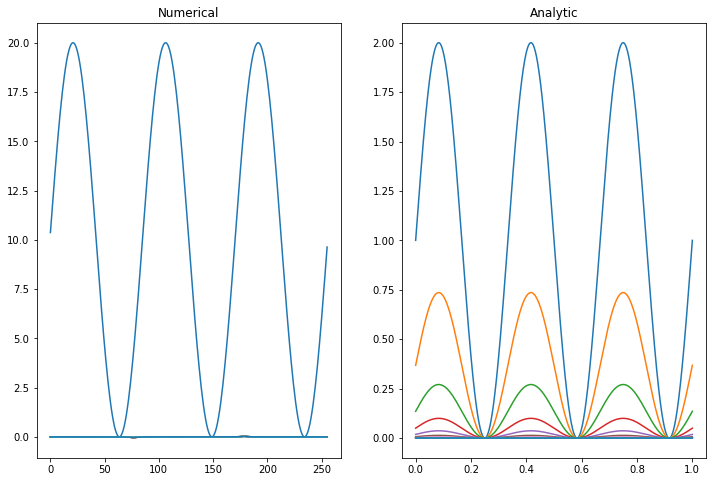

In [19]:
#plt.figure()
fig, axes = plt.subplots(1,2,figsize=(12,8))
axes = axes.flatten()
n_count = 0
for f in fs[::10]:
    axes[0].plot(f['Primitive/qx'])
    axes[1].plot(x,qx_0(x,n_count))
    axes[0].set_title('Numerical')
    axes[1].set_title('Analytic')
    plt.plot()
    n_count += 1
#plt.legend()
plt.show()

In [25]:
plt.figure()
for f in fs:
    plt.plot(f['Domain/x'], f['Auxiliary/dxT'])
plt.show()

KeyError: "Unable to open object (object 'x' doesn't exist)"

<Figure size 432x288 with 0 Axes>

In [22]:
Tall = np.zeros((len(fs), fs[0]['Primitive/T'].shape[0]))
for i, f in enumerate(fs):
    Tall[i, :] = f['Primitive/T']

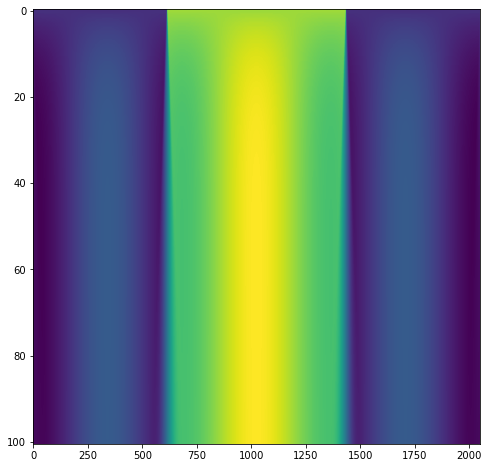

In [23]:
plt.figure(figsize=(8,8))
plt.imshow(Tall, aspect='auto')
plt.show()

This figure is all about showing that the features propagate at the expected wave speed.

In [ ]:
plt.figure(figsize=(8,8))
t = np.linspace(fs[0].attrs['t'], fs[-1].attrs['t'], len(fs)).flatten()
x = fs[0]['Domain/x']
plt.contour(x, t, Tall)
speed = np.sqrt(kappa/tau_q)
plt.plot(0.3+speed*t, t, 'r--', lw=3, alpha=0.4)
plt.plot(0.3-speed*t, t, 'r--', lw=3, alpha=0.4)
plt.plot(0.7+speed*t, t, 'r--', lw=3, alpha=0.4)
plt.plot(0.7-speed*t, t, 'r--', lw=3, alpha=0.4)
plt.show()

# 2d case

In [ ]:
fs = []
files = sorted(glob.glob('2d/data*hdf5'), key=os.path.getmtime)
for f in files:
    fs.append(h5py.File(f, 'r'))

In [ ]:
fs[0]['Domain'].attrs['dy']

In [ ]:
fs[0]['Domain/x'].shape

In [ ]:
fs[0]['Primitive/T'].shape

In [ ]:
kappa = fs[0]['Optional'].attrs['kappa'][0]
tau_q = fs[0]['Optional'].attrs['tau_q'][0]
print(f"Dissipation strength {kappa}, "
      f"relaxation time {tau_q}, "
      f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

In [ ]:
fs[-1].attrs['t']

In [ ]:
fig, axes = plt.subplots(5, 10, figsize=(10,5))
for f, ax in zip(fs[:50], axes.flatten()):
    ax.imshow(f['Primitive/T'], vmin=0, vmax=1)
#     ax.set_title(f"Time {f.attrs['t'][0]:.1f}")
    ax.axis('off')
# fig.tight_layout()
plt.subplots_adjust(wspace=0.02,hspace=0.02)
plt.show()

In [ ]:
nx, ny = fs[0]['Primitive/T'].shape
plt.figure()
for i in range(len(fs)//5):
    plt.plot(fs[5*i]['Domain/x'], fs[5*i]['Primitive/T'][:, ny//2])
    plt.plot(fs[5*i]['Domain/y'], fs[5*i]['Primitive/T'][nx//2, :])
plt.show()

In [ ]:
nx, ny = fs[0]['Primitive/T'].shape
plt.figure()
for i in range(len(fs)//5):
    plt.plot(fs[5*i]['Domain/x'], fs[5*i]['Primitive/qx'][:, ny//2])
    plt.plot(fs[5*i]['Domain/y'], fs[5*i]['Primitive/qy'][nx//2, :])
plt.show()

In [ ]:
nx, ny = fs[0]['Primitive/T'].shape
plt.figure()
for i in range(len(fs)//5):
    plt.plot(fs[5*i]['Domain/x'], fs[5*i]['Auxiliary/dxT'][:, ny//2])
    plt.plot(fs[5*i]['Domain/y'], fs[5*i]['Auxiliary/dyT'][nx//2, :])
plt.show()